In [2]:
import pandas as pd 
import seaborn as sns 

In [4]:
df = sns.load_dataset('iris')

In [6]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df ['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
df['species']=df['species'].map({'setosa':0, 'versicolor':1, 'virginica': 2})

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X = df.drop('species', axis = 1)
y = df['species']

In [18]:
from sklearn.model_selection import train_test_split 

In [20]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [46]:
dt = DecisionTreeClassifier(max_depth = 3)

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [50]:
import matplotlib.pyplot as plt

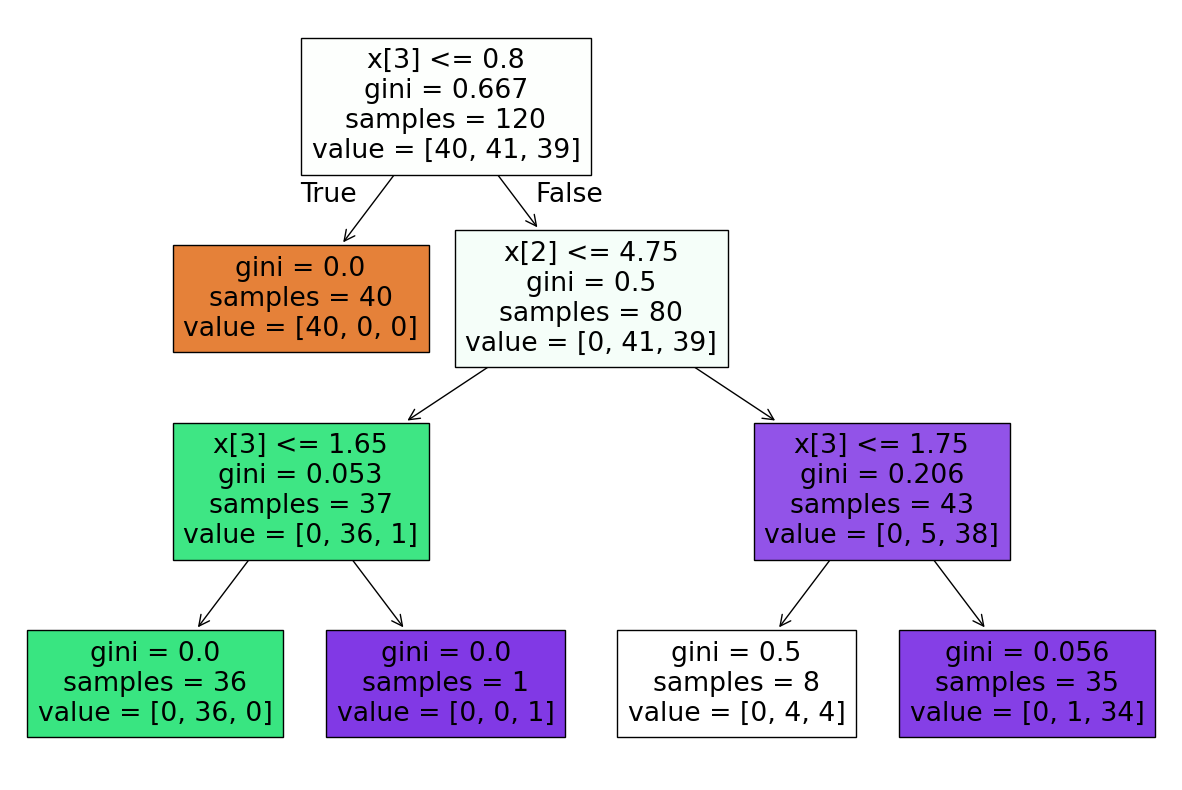

In [52]:
plt.figure(figsize = (15, 10))
plot_tree(dt, filled = True)
plt.show()    

In [54]:
from sklearn.metrics import accuracy_score

In [56]:
y_pred = dt.predict(X_test)


In [60]:
acc = accuracy_score(y_test, y_pred)

In [62]:
acc

1.0

In [64]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [66]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: species, dtype: int64

In [145]:
parameter = {
    "criterion":['gini','entropy'],
"max_depth":[1,2,3,4,5,6,7,8],
"min_samples_split":[2,3,4,5], 
"min_samples_leaf":[1,2,3],
"max_features":['auto', 'sqrt', 'log2']}

In [147]:
from sklearn.model_selection import GridSearchCV

In [149]:
dt = DecisionTreeClassifier()
cv = GridSearchCV(dt, parameter, cv = 5, scoring = "accuracy")

In [151]:
cv.fit(X_train, y_train)

C:\Users\Eliza\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
960 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Eliza\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Eliza\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Eliza\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Eliza\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [153]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 5}